In [1]:
import carla
import time
import pandas as pd

# Connect to CARLA
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)
world = client.get_world()
time.sleep(5)  # Allow vehicles to spawn

# Get all vehicles
vehicles = world.get_actors().filter('vehicle.*')

# Initialize data storage
tailgating_data = []

# Function to check if agent is tailgating
def is_tailgating(vehicle, world):
    vehicle_list = world.get_actors().filter('vehicle.*')
    for other_vehicle in vehicle_list:
        if other_vehicle.id != vehicle.id:
            distance = vehicle.get_location().distance(other_vehicle.get_location())
            if distance < 10:  # Tailgating if following within 10 meters
                return True, distance
    return False, None

# Log tailgating behavior for 5 minutes
start_time = time.time()
sampling_interval = 3.0  # Log every second
last_logged_time = start_time

while time.time() - start_time < 60:  # 1 minutes
    world.tick()
    
    if time.time() - last_logged_time >= sampling_interval:
        last_logged_time = time.time()
        
        for vehicle in vehicles:
            tailgating, distance = is_tailgating(vehicle, world)
            if tailgating:
                tailgating_data.append({"vehicle_id": vehicle.id, "time": round(time.time() - start_time, 2), "distance": round(distance, 2)})


# Save base tailgating data
df_tailgating = pd.DataFrame(tailgating_data)
df_tailgating.to_csv("tailgating_data_noisy.csv", index=False)

print("Nosiy tailgating data saved!")


Nosiy tailgating data saved!


In [3]:
import pandas as pd

# Load the datasets
df_base = pd.read_csv("tailgating_data_base.csv")
df_noisy = pd.read_csv("tailgating_data_noisy.csv")

# Display first few rows
print("Base Tailgating Data:")
display(df_base.head())

print("Noisy Tailgating Data:")
display(df_noisy.head())

# Check dataset shapes
print(f"Base Data Shape: {df_base.shape}, Noisy Data Shape: {df_noisy.shape}")


Base Tailgating Data:


,vehicle_id,time,distance
0,304,6.02,8.52
1,292,6.02,8.52
2,300,9.02,7.08
3,304,9.02,7.08
4,292,9.02,3.76


Noisy Tailgating Data:


,vehicle_id,time,distance
0,358,3.01,9.20
1,357,3.01,9.94
2,346,3.01,6.31
3,345,3.01,4.33
4,354,3.01,4.33


Base Data Shape: (15, 3), Noisy Data Shape: (197, 3)


In [7]:
# Compute average tailgating distance across all vehicles
avg_distance_base = df_base["distance"].mean()
avg_distance_noisy = df_noisy["distance"].mean()

# Compute variance in tailgating distance
var_distance_base = df_base["distance"].var()
var_distance_noisy = df_noisy["distance"].var()

# Compute average tailgating duration per vehicle
avg_duration_base = df_base.groupby("vehicle_id")["time"].count().mean()
avg_duration_noisy = df_noisy.groupby("vehicle_id")["time"].count().mean()

# Compute variance in tailgating duration
var_duration_base = df_base.groupby("vehicle_id")["time"].count().var()
var_duration_noisy = df_noisy.groupby("vehicle_id")["time"].count().var()

# Print the results
print(f"Base Avg Tailgating Distance: {avg_distance_base:.2f} m | Noisy Avg Tailgating Distance: {avg_distance_noisy:.2f} m")
print(f"Base Distance Variance: {var_distance_base:.2f} | Noisy Distance Variance: {var_distance_noisy:.2f}")
print(f"Base Avg Tailgating Duration: {avg_duration_base:.2f} s | Noisy Avg Tailgating Duration: {avg_duration_noisy:.2f} s")
print(f"Base Duration Variance: {var_duration_base:.2f} | Noisy Duration Variance: {var_duration_noisy:.2f}")


Base Avg Tailgating Distance: 5.79 m | Noisy Avg Tailgating Distance: 6.16 m
Base Distance Variance: 4.51 | Noisy Distance Variance: 4.77
Base Avg Tailgating Duration: 3.75 s | Noisy Avg Tailgating Duration: 7.04 s
Base Duration Variance: 4.25 | Noisy Duration Variance: 13.44


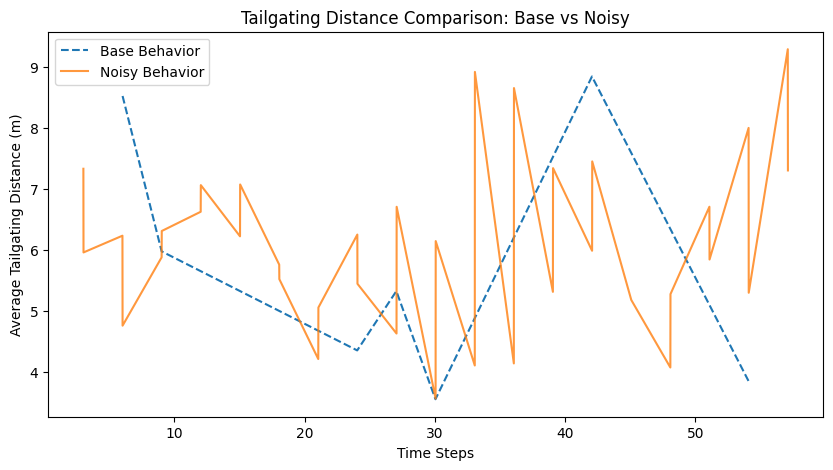

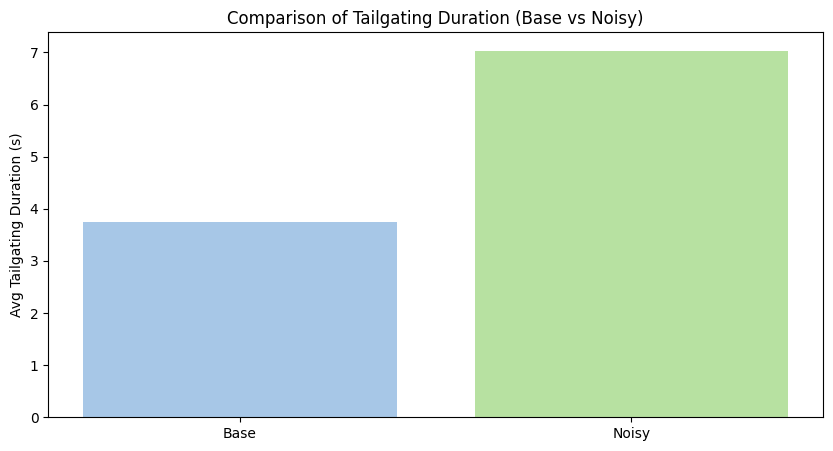

In [9]:
import matplotlib.pyplot as plt

light_blue = "#A7C7E7"  # Soft pastel blue
light_green = "#B7E1A1"  # Soft pastel green

# Compute average tailgating distance per time step
mean_distance_base = df_base.groupby("time")["distance"].mean()
mean_distance_noisy = df_noisy.groupby("time")["distance"].mean()

# Plot comparison of tailgating distance
plt.figure(figsize=(10, 5))
plt.plot(mean_distance_base, label="Base Behavior", linestyle="dashed")
plt.plot(mean_distance_noisy, label="Noisy Behavior", alpha=0.8)
plt.xlabel("Time Steps")
plt.ylabel("Average Tailgating Distance (m)")
plt.title("Tailgating Distance Comparison: Base vs Noisy")
plt.legend()
plt.show()

# Plot comparison of tailgating duration
plt.figure(figsize=(10, 5))
plt.bar(["Base", "Noisy"], [avg_duration_base, avg_duration_noisy], color=[light_blue, light_green])
plt.ylabel("Avg Tailgating Duration (s)")
plt.title("Comparison of Tailgating Duration (Base vs Noisy)")
plt.show()
